#**Aprendizaje supervisado I: Clase 1**

*Desarrollo Antonio Rinaudo*

In [6]:
# CLASE 1

# IMPORTACION DE LIBRERIAS
import numpy as np
import pandas as pd

# LIBRERIAS PARA HACER GRAFICOS
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as xp

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# 2 - CARGA DEL FICHERO DE DATOS
file = '/content/drive/MyDrive/Colab Notebooks/SPRINT 5/ASI_casoPractico.csv'
data = pd.read_csv(file, sep = ';')
data.head()

,ID,b,e,LBE,AC,FM,UC,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,1,240,357,120,0,0,0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,1
1,2,5,632,132,4,0,4,17,2.1,0,...,68,198,6,1,141,136,140,12,0,0
2,3,177,779,133,2,0,5,16,2.1,0,...,68,198,5,1,141,135,138,13,0,0
3,4,411,1192,134,2,0,6,16,2.4,0,...,53,170,11,0,137,134,137,13,1,0
4,5,533,1147,132,4,0,5,16,2.4,0,...,53,170,9,0,137,136,138,11,1,0


In [9]:
# 2 - INFORMACION DEL CONJUNTO DE DATOS
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2126 non-null   int64  
 1   b         2126 non-null   int64  
 2   e         2126 non-null   int64  
 3   LBE       2126 non-null   int64  
 4   AC        2126 non-null   int64  
 5   FM        2126 non-null   int64  
 6   UC        2126 non-null   int64  
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  DL        2126 non-null   int64  
 12  DS        2126 non-null   int64  
 13  DP        2126 non-null   int64  
 14  DR        2126 non-null   int64  
 15  Width     2126 non-null   int64  
 16  Min       2126 non-null   int64  
 17  Max       2126 non-null   int64  
 18  Nmax      2126 non-null   int64  
 19  Nzeros    2126 non-null   int64  
 20  Mode      2126 non-null   int6

In [10]:
# 2 - NUMERO DE VALORES UNICOS PARA CADA VARIABLE
data.agg(['nunique']).T.sort_values(by = 'nunique')

,nunique
DR,1
DS,2
Target,2
Tendency,3
DP,5
Nzeros,9
DL,15
Nmax,18
UC,19
AC,22


In [11]:
# 2 -ELIMINAR COUMNAS NO NECESARIAS
data = data.drop(["ID","b","e","DR"], axis = 1)
data.head()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,120,0,0,0,73,0.5,43,2.4,0,0,...,62,126,2,0,120,137,121,73,1,1
1,132,4,0,4,17,2.1,0,10.4,2,0,...,68,198,6,1,141,136,140,12,0,0
2,133,2,0,5,16,2.1,0,13.4,2,0,...,68,198,5,1,141,135,138,13,0,0
3,134,2,0,6,16,2.4,0,23.0,2,0,...,53,170,11,0,137,134,137,13,1,0
4,132,4,0,5,16,2.4,0,19.9,0,0,...,53,170,9,0,137,136,138,11,1,0


In [12]:
# 3 - ANALISIS DESCRIPTIVO - NULOS
data.isnull().sum()

LBE         0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
Target      0
dtype: int64

In [13]:
# 3 - MEDIDAS DE CENTRALIZACION, LOCALIZACION Y DISPERION
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
UC,2126.0,3.659925,2.847094,0.0,1.0,3.0,5.0,23.0
ASTV,2126.0,46.990122,17.192814,12.0,32.0,49.0,61.0,87.0
MSTV,2126.0,1.332785,0.883241,0.2,0.7,1.2,1.7,7.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
MLTV,2126.0,8.187629,5.628247,0.0,4.6,7.4,10.8,50.7
DL,2126.0,1.570085,2.499229,0.0,0.0,0.0,3.0,16.0
DS,2126.0,0.003293,0.057300,0.0,0.0,0.0,0.0,1.0


Target
0    1655
1     471
Name: count, dtype: int64


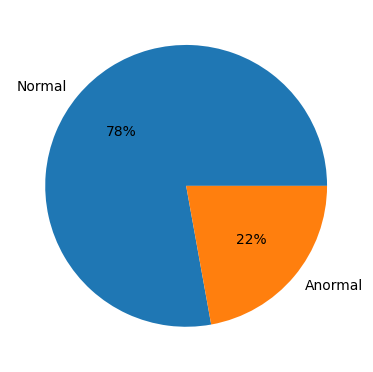

In [14]:
# 3 - DISTRIBUCION DE FRECUENCIAS DEL TARGET
a, b = data['Target'].value_counts()
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.pie([a, b], labels=["Normal", "Anormal"], autopct="%1.0f%%")
print(data["Target"].value_counts())

<ipython-input-15-3f293c48b293>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


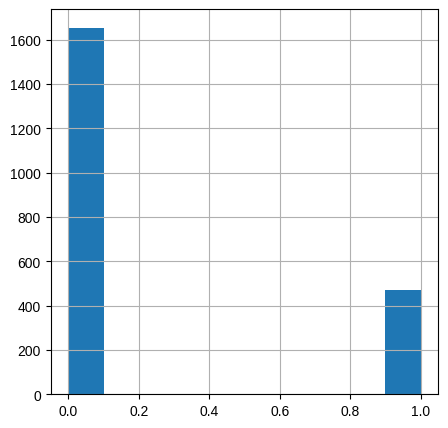

In [15]:
# 3 - HISTOGRAMA
fig, ax = plt.subplots(1,1,figsize=(5,5))
plt.style.use("seaborn")
data['Target'].hist(ax=ax);

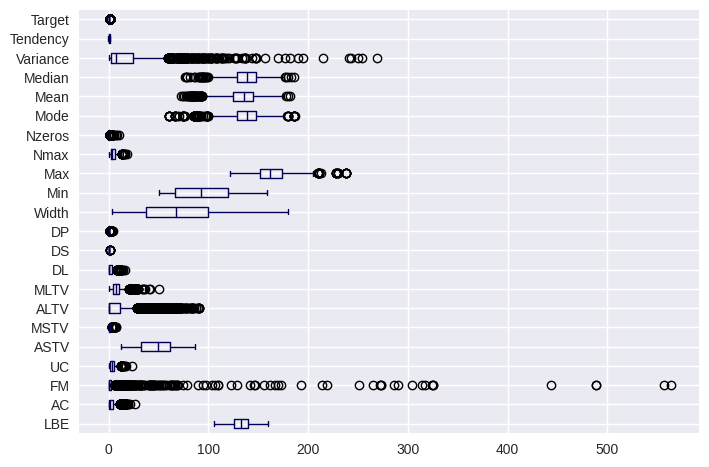

In [16]:
# BOX PLOT
data_box_plot = data.boxplot(vert=False, color = "#000054")

# Sprint 1 de Aprendizaje supervisado I

## Clasifique cada variable según su tipo, cualitativa o cuantitativa discreta o continúa.


Procedemos a verificar el tipo de variable del dataframe cargado
recordando que fueron eliminadas las siguientes columnas:

"b" = Start time;
"e" = End time;
"ID" = identidad.

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
UC,2126.0,3.659925,2.847094,0.0,1.0,3.0,5.0,23.0
ASTV,2126.0,46.990122,17.192814,12.0,32.0,49.0,61.0,87.0
MSTV,2126.0,1.332785,0.883241,0.2,0.7,1.2,1.7,7.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
MLTV,2126.0,8.187629,5.628247,0.0,4.6,7.4,10.8,50.7
DL,2126.0,1.570085,2.499229,0.0,0.0,0.0,3.0,16.0
DS,2126.0,0.003293,0.057300,0.0,0.0,0.0,0.0,1.0


In [20]:
data_variables = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SPRINT 5/Detalle de las variables.csv", sep = ';')
data_variables

,Variable,Descripción
0,ID,Observation ID
1,b,Start time
2,e,End time
3,LBE,Fetal heart rate baseline (beats per minute)
4,AC,Number of accelerations per second
5,FM,Number of fetal movements per second
6,UC,Number of uterine contractions per second
7,ASTV,Percentage of time with abnormal short-term va...
8,MSTV,Mean value of short-term variability
9,ALTV,Percentage of time with abnormal long-term var...


LBE = es una variable cuantitativa continua

AC = es una variable cuantitativa discreta

FM = es una variable cuantitativa discreta

UC = es una variable cuantitativa discreta

ASTV = es una variable cuantitativa continua

MSTV = es una variable cuantativa continua anque su variabilidad es muy reducida.

ALTV = es una variable cuantitativa discreta

MLTV = es una variable cuantitativa continua

DL = es una variable cuantitativa discreta

DS = es una variable cuantitativa discreta

DP = es una variable cuantitativa discreta

DR = Eliminada

Width = es una variable cuantitativa continua

Min = es una variable cuantitativa continua

Max = es una variable cuantitativa continua

Nmax = es una variable cuantitativa discreta

Nzeros = es una variable cuantitativa discreta

Mode = es una variable cuantitativa continua

Mean = es una variable cuantitativa continua

Median = es una variable cuantitativa continua

Variance = es una variable cuantitativa continua con muchos outliers

Tendency = es una variable cuantitativa discreta

Target = es una variable dicotómica



##¿Cuál es la proporción de estados fetales normales? ¿y anormales?


El porcentaje de estatos fetales normales es:

In [38]:
porcentaje_normales = (data[data["Target"] == 0] ["Target"].count())/(data.shape[0])
porcentaje_normales

0.7784571966133584

In [39]:
porcentajes_anormales = 1-porcentaje_normales
porcentajes_anormales

0.22154280338664156

## Obtenga las medidas de centralización, localización y dispersión para las variables:  FM, ALTV y Median.


### FM

CENTRALIZACIÓN FM

In [43]:
media_FM = data["FM"].mean()
mediana_FM = data["FM"].median()
moda_FM = data["FM"].mode()
print("La media de FM es: ", media_FM)
print("La mediana de FM es: ", mediana_FM)
print("La moda de FM es: ", moda_FM)

La media de FM es:  7.241298212605833
La mediana de FM es:  0.0
La moda de FM es:  0    0
Name: FM, dtype: int64


LOCALIZACIÓN Y DISPERSION FM

In [41]:
data["FM"].describe()


count    2126.000000
mean        7.241298
std        37.125309
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max       564.000000
Name: FM, dtype: float64

### ALTV

CENTRALIZACIÓN ALTV

In [44]:
media_ALTV = data["ALTV"].mean()
mediana_ALTV = data["ALTV"].median()
moda_ALTV = data["ALTV"].mode()
print("La media de ALTV es: ", media_ALTV)
print("La mediana de ALTV es: ", mediana_ALTV)
print("La moda de ALTV es: ", moda_ALTV)

La media de ALTV es:  9.846660395108184
La mediana de ALTV es:  0.0
La moda de ALTV es:  0    0
Name: ALTV, dtype: int64


LOCALIZACIÓN Y DISPERSION ALTV

In [45]:
data["ALTV"].describe()


count    2126.00000
mean        9.84666
std        18.39688
min         0.00000
25%         0.00000
50%         0.00000
75%        11.00000
max        91.00000
Name: ALTV, dtype: float64

### Median

CENTRALIZACIÓN Median

In [47]:
media_Median = data["Median"].mean()
mediana_Median = data["Median"].median()
moda_Median = data["Median"].mode()
print("La media de Median es: ", media_Median)
print("La mediana de Median es: ", mediana_Median)
print("La moda de Median es: ", moda_Median)

La media de Median es:  138.09031044214487
La mediana de Median es:  139.0
La moda de Median es:  0    146
Name: Median, dtype: int64


LOCALIZACIÓN Y DISPERSION Median

In [48]:
data["Median"].describe()


count    2126.000000
mean      138.090310
std        14.466589
min        77.000000
25%       129.000000
50%       139.000000
75%       148.000000
max       186.000000
Name: Median, dtype: float64

## Obtenga el histograma para las variables: LBE, DS y Min.


<Axes: >

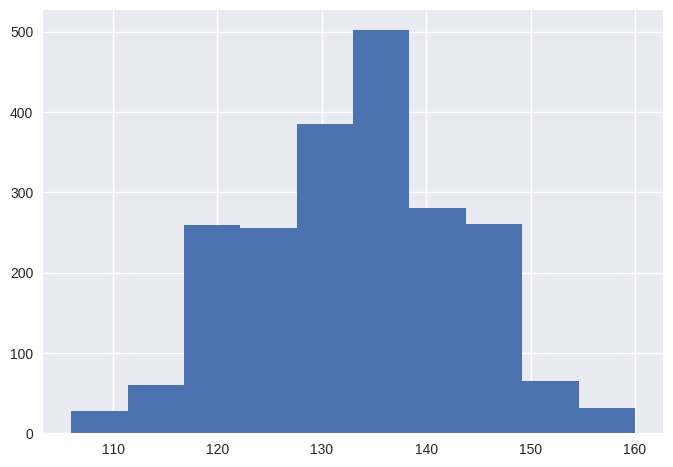

In [49]:
data["LBE"].hist()

<Axes: >

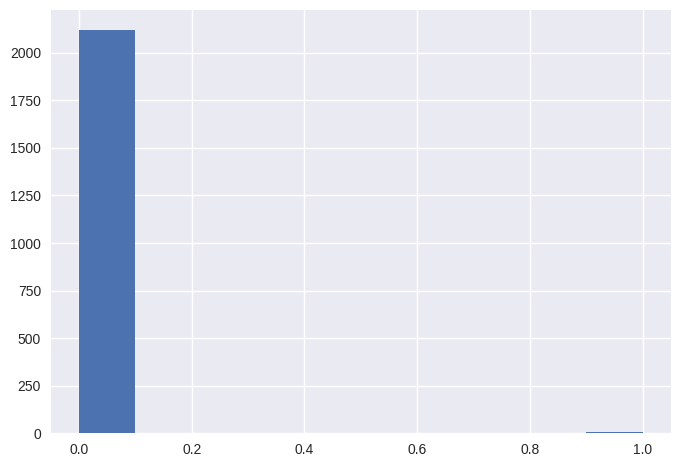

In [50]:
data["DS"].hist()

<Axes: >

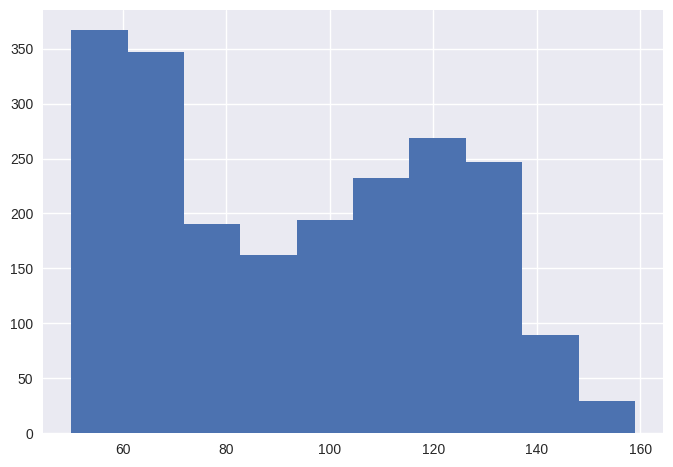

In [51]:
data["Min"].hist()

##  Obtenga un gráfico box-plot para las variables: AC, ASTV y Mean.


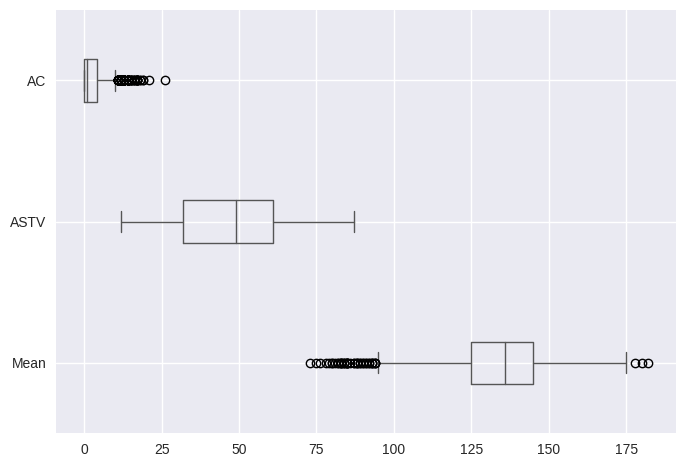

In [58]:
data_box_plot_AC = data.boxplot(vert=False, color = "#555555", column=[ 'Mean','ASTV', 'AC'])